# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 
  - There is a positive linear correlation between the weight of mice and the average volume of the tumors. This could indicate that the physical health of the mice correlates with the size of the tumor or that the tumor itself is adding noticeable weight to the mice. In the first instance, better exercise and a healthier diet for the mice may prove effective in decreasing the volum of the tumor. In the second instance, the weight of the mice may be a signal about the existence and size of a tumor that researchers can use going forward.
  - Capomulin and Ramicane seemed more effective in the treatment of the tumors than Infubinol and Ceftamin, as shown by the data and the boxplot. The mice on Capomulin and Ramicane had smaller average tumor size compared to the mice on Infubinol and Ceftamin. 
  - Mice on Capomulin had their tumors signifcantly decrease in volume while on the drug. As the linechart shows, mouse 1509 saw a decrease in tumor size 20 days after starting Capomulin.

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouseDF = pd.merge(mouse_metadata, study_results, how="outer",on="Mouse ID")

# Display the data table for preview
mouseDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [70]:
# Checking the number of mice.
len(mouseDF['Mouse ID'].unique())

249

In [71]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseDF['Mouse ID'].value_counts()

Mouse ID
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

In [72]:
# Optional: Get all the data for the duplicate mouse ID. 
indexDF = mouseDF.set_index('Mouse ID')
indexDF.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [73]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = indexDF.drop(['g989'])
cleanDF.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [74]:
# Checking the number of mice in the clean DataFrame.
cleanDF = cleanDF.reset_index()
len(cleanDF['Mouse ID'].unique())

248

## Summary Statistics

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tvolume = cleanDF.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tmean = tvolume['Tumor Volume (mm3)'].mean()
tmedian = tvolume['Tumor Volume (mm3)'].median()
tvariance = tvolume['Tumor Volume (mm3)'].var()
tstd = tvolume['Tumor Volume (mm3)'].std()
tSEM = tvolume['Tumor Volume (mm3)'].sem()

tumorDF = pd.DataFrame({
    'Mean Tumor Volume': tmean,
    'Median Tumor Volume': tmedian,
    'Tumor Volume Variance': tvariance,
    'Tumor Volume Std. Dev.': tstd,
    'Tumor Volume Std. Err.': tSEM
    })

tumorDF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [76]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumors = cleanDF.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumors

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

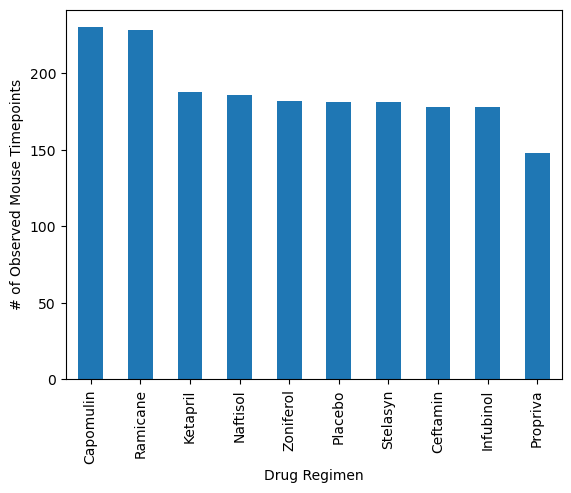

In [77]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
barChart = cleanDF.groupby(['Drug Regimen'])['Timepoint'].count()
barChart.sort_values(ascending=False).plot.bar(ylabel='# of Observed Mouse Timepoints')
plt.show()

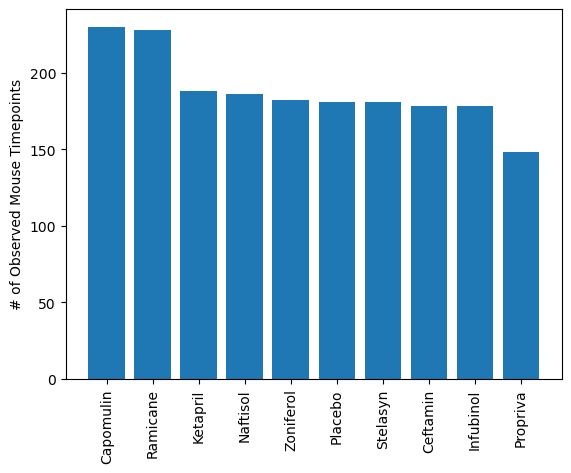

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
barChart2 = barChart.sort_values(ascending=False)
plt.bar(barChart2.index, barChart2.values)
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show()

<Axes: ylabel='Sex'>

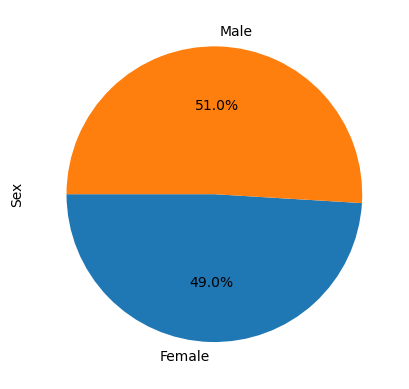

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pieChart = cleanDF.groupby(['Sex'])['Sex'].count()
pieChart.plot.pie(startangle=180, autopct='%1.1f%%')

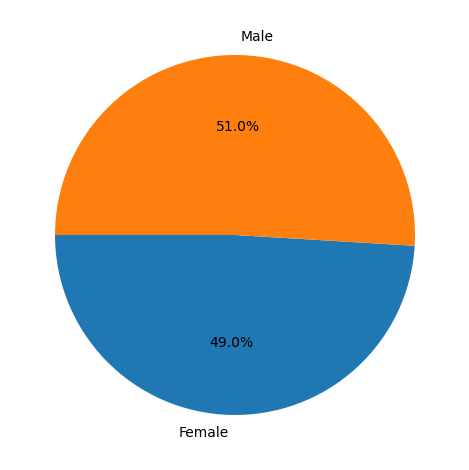

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pieChart = cleanDF.groupby(['Sex'])['Sex'].count()
plt.pie(pieChart, labels=('Female', 'Male'), startangle=180, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lastTimepoint = cleanDF.groupby(['Mouse ID'])['Timepoint'].max()
lastTimepointDF = pd.DataFrame(lastTimepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
lastTimepointDF = pd.merge(cleanDF, lastTimepointDF, on=('Mouse ID', 'Timepoint'), how='right')
lastTimepointDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [82]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tCapomulin = []
tRamicane = []
tInfubinol = []
tCeftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in lastTimepointDF.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tCapomulin.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tRamicane.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tInfubinol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tCeftamin.append(row['Tumor Volume (mm3)'])
    
    # add subset 
    # Determine outliers using upper and lower bounds
treatmentDF = pd.DataFrame({
    'Capomulin': tCapomulin,
    'Ramicane': tRamicane,
    'Infubinol': tInfubinol,
    'Ceftamin': tCeftamin
})

# Quartiles and stats for treatment drugs
# Capomulin
qCap = treatmentDF[treatments[0]].quantile([.25,.5,.75])
lqCap = qCap[0.25]
medCap = qCap[0.5]
uqCap = qCap[0.75]
iqrCap = uqCap-lqCap
lbCap = lqCap - (1.5*iqrCap)
ubCap = uqCap + (1.5*iqrCap)
minCap = treatmentDF['Capomulin'].min()
maxCap = treatmentDF['Capomulin'].max()

# Ramicane
qRam = treatmentDF[treatments[1]].quantile([.25,.5,.75])
lqRam = qRam[0.25]
medRam = qRam[0.5]
uqRam = qRam[0.75]
iqrRam = uqRam-lqRam
lbRam = lqRam - (1.5*iqrRam)
ubRam = uqRam + (1.5*iqrRam)
minRam = treatmentDF['Ramicane'].min()
maxRam = treatmentDF['Ramicane'].max()

# Infubinol
qInf = treatmentDF[treatments[2]].quantile([.25,.5,.75])
lqInf = qInf[0.25]
medInf = qInf[0.5]
uqInf = qInf[0.75]
iqrInf = uqInf-lqInf
lbInf = lqInf - (1.5*iqrInf)
ubInf = uqInf + (1.5*iqrInf)
minInf = treatmentDF['Infubinol'].min()
maxInf = treatmentDF['Infubinol'].max()

# Ceftamin
qCef = treatmentDF[treatments[3]].quantile([.25,.5,.75])
lqCef = qCef[0.25]
medCef = qCef[0.5]
uqCef = qCef[0.75]
iqrCef = uqCef-lqCef
lbCef = lqCef - (1.5*iqrCef)
ubCef = uqCef + (1.5*iqrCef)
minCef = treatmentDF['Ceftamin'].min()
maxCef = treatmentDF['Ceftamin'].max()

# Outliers for each drug
outliers = pd.DataFrame({'Drug': treatments,
                         'Lower Quartile':[lqCap, lqRam, lqInf, lqCef],
                         'Upper Quartile':[uqCap, uqRam, uqInf, uqCef],
                         'IQR':[iqrCap, iqrRam, iqrInf, iqrCef],
                         'Median':[medCap, medRam, medInf, medCef],
                        'Upper Bound': [ubCap, ubRam, ubInf, ubCef],
                        'Lower Bound': [lbCap, lbRam, lbInf, lbCef],
                        'Max': [maxCap, maxRam, maxInf, maxCef],
                         'Min': [minCap, minRam, minInf, minCef]
                        })

outliers
outliers_group = outliers.groupby('Drug')
outliers_group.sum()

,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max,Min
Drug,,,,,,,,
Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562,47.685963,23.343598
Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450,68.923185,45.000000
Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,72.226731,36.321346
Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664,45.220869,22.050126


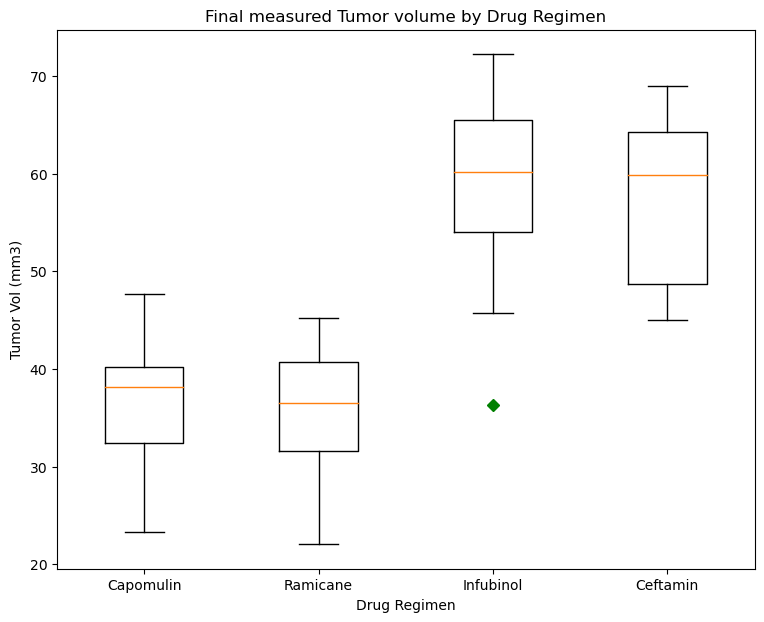

In [83]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplotList = [treatmentDF[treatments[0]],
                treatmentDF[treatments[1]],
                treatmentDF[treatments[2]],
                treatmentDF[treatments[3]]
               ]

fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen') #set title
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplotList, 0, 'gD')

plt.xticks([1,2,3,4], treatments)
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

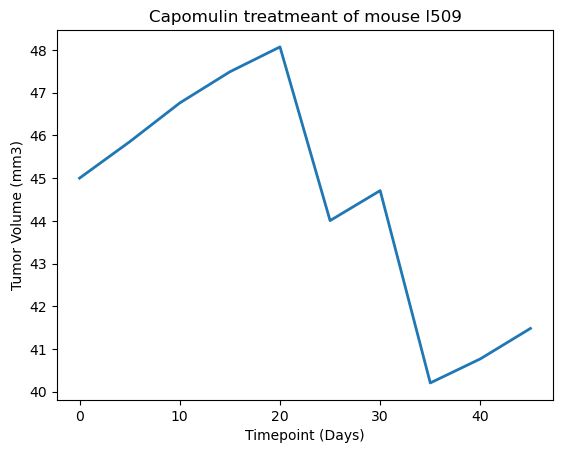

In [84]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
lineDF = cleanDF.loc[cleanDF["Mouse ID"] == "l509",:]
lineDF
x_axisTP = lineDF["Timepoint"] 
tumsiz = lineDF["Tumor Volume (mm3)"] 

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('linechart')
plt.show()

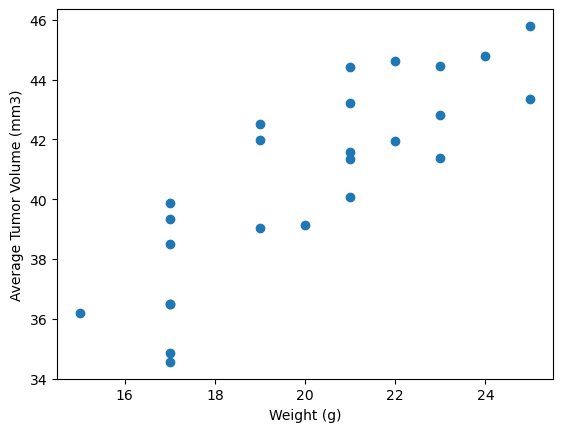

In [85]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capDF = cleanDF.loc[cleanDF["Drug Regimen"] == "Capomulin",:]
capAvg = capDF.groupby(['Mouse ID']).mean(numeric_only=True)

plt.scatter(capAvg['Weight (g)'],capAvg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


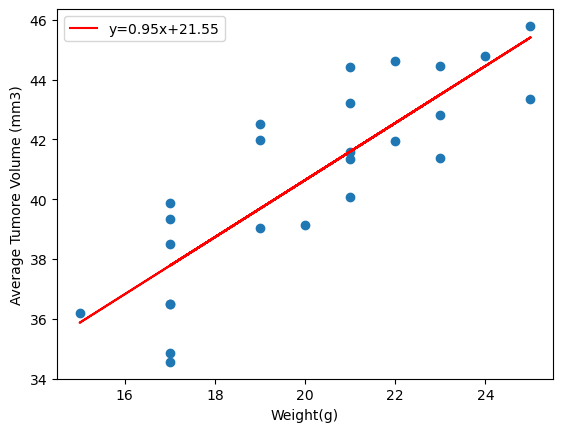

In [86]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation=round(st.pearsonr(capAvg['Weight (g)'],capAvg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

model=st.linregress(capAvg['Weight (g)'],capAvg['Tumor Volume (mm3)'])
model

slope = 0.9544396890241045
intercept = 21.552160532685015
line = slope*(capAvg['Weight (g)'])+intercept

plt.scatter(capAvg['Weight (g)'],capAvg['Tumor Volume (mm3)'])
plt.plot(capAvg['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.legend()
plt.savefig('linearregression')
plt.show()